In [1]:
import numpy as np
import cv2 as cv2
import argparse
import matplotlib.pyplot as plt
from numpy import mgrid,vstack


## Q1

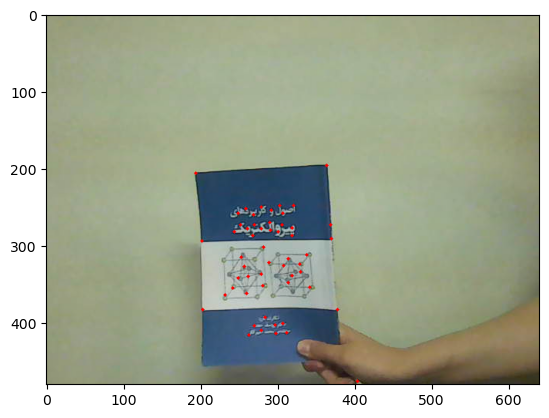

In [6]:
#capture frame from camera
obj = cv2.VideoCapture(0)
success, frame = obj.read()
obj_pic=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
#extreact keypoint base image
p0=cv2.goodFeaturesToTrack(obj_pic,55,0.02,10,False)
#draw point on image
img=cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
for i in p0:
    x,y = i.ravel()
    cv2.circle(img,(int(x),int(y)),2,(255,0,0),-1)
    
# Display the image
plt.imshow(img)
plt.show()

In [7]:
obj.release()

## Q2

In [10]:
cap = cv2.VideoCapture(0)

# params for corner detection
feature_params = dict(maxCorners=100,
                      qualityLevel=0.3,
                      minDistance=7,
                      blockSize=7)

# Parameters for lucas kanade optical flow
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                           10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))

frames_3=np.zeros((3,480,640))

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

frames_3[0] = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[1] = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[2] = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
#creating an object of videoWriter for writing video
out = cv2.VideoWriter('q2.avi',fourcc, 15, (int(cap.get(3)),int(cap.get(4))))

while (1):

    ret, frame = cap.read()
    if ret:
        # frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(gray.shape)
        frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
        # print(frames_3.shape)

        frames_3 = np.delete(frames_3, 0, axis=0)
        print(frames_3)
        print(frames_3.shape)

        image1 = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        image2 = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        image3 = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        old_gray = image1

        p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,image2,p0, None,**lk_params)

        # Select good points
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # draw the tracks
        mask = np.zeros_like(frame)
        for i, (new, old) in enumerate(zip(good_new,good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)),color=(0,255,255), thickness=2)

            frame = cv2.circle(frame, (int(a), int(b)), 5,color=(0,255,255), thickness=-1)

        img = cv2.add(frame, mask)

        # Updating Previous frame and points
        old_gray = image2.copy()
        p0 = good_new.reshape(-1, 1, 2)


        old_gray_2 = image2

        p0_2 = cv2.goodFeaturesToTrack(old_gray_2, mask=None, **feature_params)

        p1_2, st_2, err = cv2.calcOpticalFlowPyrLK(old_gray_2,image3,p0_2, None,**lk_params)

        # Select good points
        good_new_2 = p1_2[st_2 == 1]
        good_old_2 = p0_2[st_2 == 1]

        # draw the tracks
        mask_2 = np.zeros_like(frame)
        for i, (new, old) in enumerate(zip(good_new_2,good_old_2)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask_2, (int(a), int(b)), (int(c), int(d)),color=(0,0,255), thickness=2)

            frame = cv2.circle(frame, (int(a), int(b)), 5,color=(0,0,255), thickness=-1)

        img = cv2.add(frame, mask)

        out.write(img)
        cv2.imshow('frame', img)

        if cv2.waitKey(20) & 0xFF == ord('q'):
            break


        # Updating Previous frame and points
        old_gray_2 = image3.copy()
        p0_2 = good_new_2.reshape(-1, 1, 2)
cv2.destroyAllWindows()
cap.release()
out.release()

[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[146. 146. 146. ... 157. 158. 159.]
  [147. 147. 147. ... 157. 158. 158.]
  [147. 147. 147. ... 157. 158. 158.]
  ...
  [136. 136. 136. ...  63.  63.  63.]
  [136. 136. 136. ...  63.  63.  63.]
  [136. 136. 136. ...  63.  63.  63.]]]
(3, 480, 640)
[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[146. 146. 146. ... 157. 158. 159.]
  [1

(480, 640)
[[[152. 152. 152. ... 157. 157. 158.]
  [152. 152. 152. ... 157. 158. 158.]
  [151. 151. 151. ... 158. 158. 159.]
  ...
  [131. 131. 130. ...  60.  60.  60.]
  [133. 133. 132. ...  59.  60.  60.]
  [135. 134. 133. ...  59.  59.  59.]]

 [[151. 151. 151. ... 157. 158. 159.]
  [151. 151. 151. ... 158. 158. 159.]
  [151. 151. 151. ... 158. 159. 160.]
  ...
  [133. 133. 134. ...  60.  60.  60.]
  [135. 135. 135. ...  60.  60.  60.]
  [136. 136. 137. ...  60.  60.  60.]]

 [[149. 148. 147. ... 154. 153. 152.]
  [148. 148. 148. ... 154. 153. 152.]
  [148. 148. 149. ... 154. 153. 153.]
  ...
  [132. 132. 132. ...  60.  60.  60.]
  [133. 133. 133. ...  60.  60.  60.]
  [134. 134. 134. ...  59.  60.  60.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 151. ... 157. 158. 159.]
  [151. 151. 151. ... 158. 158. 159.]
  [151. 151. 151. ... 158. 159. 160.]
  ...
  [133. 133. 134. ...  60.  60.  60.]
  [135. 135. 135. ...  60.  60.  60.]
  [136. 136. 137. ...  60.  60.  60.]]

 [[149. 148. 147. ..

(480, 640)
[[[147. 147. 148. ... 157. 156. 155.]
  [147. 147. 148. ... 158. 156. 156.]
  [147. 147. 148. ... 158. 157. 156.]
  ...
  [131. 131. 131. ...  60.  60.  60.]
  [131. 131. 132. ...  60.  60.  59.]
  [132. 132. 132. ...  60.  59.  59.]]

 [[149. 149. 150. ... 158. 157. 157.]
  [148. 149. 149. ... 158. 157. 157.]
  [148. 148. 149. ... 157. 157. 157.]
  ...
  [133. 133. 132. ...  71.  72.  73.]
  [132. 132. 132. ...  72.  73.  73.]
  [132. 132. 132. ...  72.  73.  74.]]

 [[148. 149. 149. ... 157. 157. 156.]
  [148. 148. 149. ... 157. 157. 156.]
  [148. 148. 148. ... 157. 156. 156.]
  ...
  [133. 132. 132. ...  72.  73.  73.]
  [133. 133. 132. ...  72.  73.  74.]
  [132. 133. 133. ...  72.  73.  74.]]]
(3, 480, 640)
(480, 640)
[[[149. 149. 150. ... 158. 157. 157.]
  [148. 149. 149. ... 158. 157. 157.]
  [148. 148. 149. ... 157. 157. 157.]
  ...
  [133. 133. 132. ...  71.  72.  73.]
  [132. 132. 132. ...  72.  73.  73.]
  [132. 132. 132. ...  72.  73.  74.]]

 [[148. 149. 149. ..

(480, 640)
[[[150. 151. 152. ... 161. 160. 159.]
  [151. 151. 152. ... 162. 161. 160.]
  [151. 152. 152. ... 162. 161. 160.]
  ...
  [136. 135. 134. ...  85.  84.  83.]
  [135. 134. 133. ...  84.  84.  83.]
  [135. 134. 133. ...  84.  84.  85.]]

 [[153. 153. 152. ... 160. 159. 159.]
  [153. 153. 152. ... 160. 160. 159.]
  [153. 153. 153. ... 160. 160. 160.]
  ...
  [137. 135. 132. ...  81.  81.  81.]
  [137. 135. 132. ...  81.  81.  81.]
  [135. 134. 132. ...  81.  81.  82.]]

 [[153. 153. 152. ... 160. 159. 159.]
  [153. 153. 152. ... 160. 160. 159.]
  [153. 153. 153. ... 160. 160. 160.]
  ...
  [137. 135. 132. ...  81.  81.  81.]
  [137. 135. 132. ...  81.  81.  81.]
  [135. 134. 132. ...  81.  81.  82.]]]
(3, 480, 640)
(480, 640)
[[[153. 153. 152. ... 160. 159. 159.]
  [153. 153. 152. ... 160. 160. 159.]
  [153. 153. 153. ... 160. 160. 160.]
  ...
  [137. 135. 132. ...  81.  81.  81.]
  [137. 135. 132. ...  81.  81.  81.]
  [135. 134. 132. ...  81.  81.  82.]]

 [[153. 153. 152. ..

(480, 640)
[[[154. 154. 154. ... 162. 162. 162.]
  [154. 154. 154. ... 162. 162. 162.]
  [154. 154. 154. ... 162. 162. 162.]
  ...
  [139. 139. 139. ...  61.  61.  61.]
  [139. 139. 139. ...  62.  61.  61.]
  [139. 139. 139. ...  62.  61.  61.]]

 [[149. 149. 149. ... 156. 156. 156.]
  [148. 148. 149. ... 156. 156. 156.]
  [148. 148. 148. ... 156. 156. 156.]
  ...
  [141. 140. 140. ...  62.  62.  62.]
  [140. 140. 140. ...  62.  62.  62.]
  [140. 140. 139. ...  62.  62.  62.]]

 [[151. 150. 150. ... 157. 157. 157.]
  [150. 150. 149. ... 157. 157. 157.]
  [148. 149. 149. ... 156. 156. 156.]
  ...
  [134. 133. 132. ...  58.  58.  58.]
  [133. 134. 133. ...  57.  58.  58.]
  [133. 134. 134. ...  57.  57.  58.]]]
(3, 480, 640)
(480, 640)
[[[149. 149. 149. ... 156. 156. 156.]
  [148. 148. 149. ... 156. 156. 156.]
  [148. 148. 148. ... 156. 156. 156.]
  ...
  [141. 140. 140. ...  62.  62.  62.]
  [140. 140. 140. ...  62.  62.  62.]
  [140. 140. 139. ...  62.  62.  62.]]

 [[151. 150. 150. ..

(480, 640)
[[[150. 151. 152. ... 160. 159. 158.]
  [151. 151. 152. ... 159. 159. 158.]
  [151. 152. 152. ... 159. 159. 158.]
  ...
  [140. 140. 139. ...  55.  55.  55.]
  [141. 140. 140. ...  55.  55.  55.]
  [141. 140. 140. ...  55.  55.  55.]]

 [[151. 151. 151. ... 160. 159. 158.]
  [151. 151. 152. ... 160. 159. 158.]
  [151. 151. 152. ... 160. 159. 158.]
  ...
  [140. 139. 139. ...  56.  56.  56.]
  [140. 140. 140. ...  56.  57.  57.]
  [140. 140. 140. ...  57.  57.  57.]]

 [[152. 152. 152. ... 157. 157. 157.]
  [152. 152. 152. ... 157. 157. 157.]
  [152. 152. 152. ... 157. 157. 157.]
  ...
  [140. 141. 141. ...  59.  59.  59.]
  [141. 141. 141. ...  60.  59.  59.]
  [141. 141. 141. ...  60.  60.  59.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 151. ... 160. 159. 158.]
  [151. 151. 152. ... 160. 159. 158.]
  [151. 151. 152. ... 160. 159. 158.]
  ...
  [140. 139. 139. ...  56.  56.  56.]
  [140. 140. 140. ...  56.  57.  57.]
  [140. 140. 140. ...  57.  57.  57.]]

 [[152. 152. 152. ..

(480, 640)
[[[153. 154. 154. ... 162. 162. 162.]
  [153. 154. 154. ... 162. 162. 162.]
  [153. 154. 154. ... 163. 163. 163.]
  ...
  [139. 138. 138. ...  59.  59.  59.]
  [139. 139. 138. ...  59.  59.  59.]
  [140. 139. 139. ...  59.  59.  59.]]

 [[155. 155. 155. ... 162. 162. 161.]
  [154. 154. 154. ... 162. 162. 162.]
  [154. 154. 154. ... 162. 162. 162.]
  ...
  [139. 139. 138. ...  59.  59.  59.]
  [139. 139. 138. ...  59.  59.  59.]
  [140. 139. 138. ...  60.  59.  59.]]

 [[153. 153. 152. ... 163. 163. 163.]
  [153. 153. 152. ... 163. 162. 162.]
  [153. 153. 152. ... 162. 162. 162.]
  ...
  [140. 140. 141. ...  56.  56.  56.]
  [140. 141. 141. ...  56.  56.  56.]
  [140. 141. 142. ...  56.  56.  56.]]]
(3, 480, 640)
(480, 640)
[[[155. 155. 155. ... 162. 162. 161.]
  [154. 154. 154. ... 162. 162. 162.]
  [154. 154. 154. ... 162. 162. 162.]
  ...
  [139. 139. 138. ...  59.  59.  59.]
  [139. 139. 138. ...  59.  59.  59.]
  [140. 139. 138. ...  60.  59.  59.]]

 [[153. 153. 152. ..

(480, 640)
[[[155. 155. 155. ... 162. 162. 162.]
  [155. 155. 155. ... 162. 162. 162.]
  [155. 155. 155. ... 163. 162. 162.]
  ...
  [143. 143. 142. ...  51.  52.  52.]
  [143. 143. 142. ...  50.  51.  52.]
  [143. 143. 142. ...  50.  51.  52.]]

 [[154. 154. 154. ... 160. 160. 160.]
  [154. 154. 154. ... 160. 160. 160.]
  [154. 154. 154. ... 160. 161. 161.]
  ...
  [145. 144. 143. ...  65.  65.  65.]
  [145. 144. 143. ...  66.  66.  66.]
  [145. 144. 143. ...  66.  66.  67.]]

 [[154. 153. 153. ... 160. 160. 159.]
  [154. 153. 153. ... 160. 160. 160.]
  [154. 153. 152. ... 160. 160. 160.]
  ...
  [145. 144. 144. ...  65.  66.  66.]
  [145. 145. 144. ...  66.  67.  67.]
  [145. 145. 144. ...  67.  67.  68.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 154. ... 160. 160. 160.]
  [154. 154. 154. ... 160. 160. 160.]
  [154. 154. 154. ... 160. 161. 161.]
  ...
  [145. 144. 143. ...  65.  65.  65.]
  [145. 144. 143. ...  66.  66.  66.]
  [145. 144. 143. ...  66.  66.  67.]]

 [[154. 153. 153. ..

(480, 640)
[[[152. 151. 151. ... 160. 159. 159.]
  [152. 152. 152. ... 159. 159. 159.]
  [152. 152. 152. ... 159. 159. 159.]
  ...
  [138. 138. 138. ...  60.  61.  61.]
  [138. 138. 137. ...  60.  61.  61.]
  [138. 138. 137. ...  60.  60.  61.]]

 [[151. 151. 152. ... 158. 158. 158.]
  [151. 151. 152. ... 158. 158. 158.]
  [151. 151. 151. ... 158. 158. 158.]
  ...
  [139. 139. 139. ...  60.  61.  61.]
  [139. 139. 139. ...  60.  61.  61.]
  [138. 138. 138. ...  60.  61.  61.]]

 [[152. 152. 152. ... 162. 162. 161.]
  [152. 152. 152. ... 162. 162. 162.]
  [152. 152. 152. ... 161. 162. 162.]
  ...
  [136. 136. 137. ...  60.  60.  61.]
  [136. 136. 137. ...  60.  60.  61.]
  [136. 137. 138. ...  59.  60.  61.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 152. ... 158. 158. 158.]
  [151. 151. 152. ... 158. 158. 158.]
  [151. 151. 151. ... 158. 158. 158.]
  ...
  [139. 139. 139. ...  60.  61.  61.]
  [139. 139. 139. ...  60.  61.  61.]
  [138. 138. 138. ...  60.  61.  61.]]

 [[152. 152. 152. ..

(480, 640)
[[[153. 152. 152. ... 161. 161. 160.]
  [151. 151. 151. ... 161. 161. 160.]
  [151. 151. 151. ... 161. 161. 160.]
  ...
  [138. 138. 138. ...  58.  57.  57.]
  [138. 138. 138. ...  57.  57.  56.]
  [138. 138. 138. ...  57.  56.  56.]]

 [[151. 151. 151. ... 157. 156. 156.]
  [151. 151. 151. ... 158. 157. 156.]
  [152. 151. 151. ... 158. 157. 157.]
  ...
  [138. 138. 138. ...  57.  57.  57.]
  [138. 138. 139. ...  57.  57.  57.]
  [137. 138. 139. ...  56.  56.  56.]]

 [[153. 153. 153. ... 161. 161. 161.]
  [152. 153. 153. ... 160. 160. 160.]
  [152. 152. 153. ... 159. 159. 160.]
  ...
  [138. 138. 139. ...  58.  57.  57.]
  [137. 138. 139. ...  58.  57.  57.]
  [137. 138. 139. ...  57.  57.  57.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 151. ... 157. 156. 156.]
  [151. 151. 151. ... 158. 157. 156.]
  [152. 151. 151. ... 158. 157. 157.]
  ...
  [138. 138. 138. ...  57.  57.  57.]
  [138. 138. 139. ...  57.  57.  57.]
  [137. 138. 139. ...  56.  56.  56.]]

 [[153. 153. 153. ..

(480, 640)
[[[155. 155. 155. ... 160. 159. 159.]
  [155. 154. 154. ... 159. 159. 159.]
  [154. 154. 154. ... 159. 159. 158.]
  ...
  [143. 143. 144. ... 120. 120. 120.]
  [143. 143. 144. ... 120. 120. 120.]
  [143. 143. 144. ... 120. 120. 120.]]

 [[152. 153. 154. ... 160. 160. 160.]
  [153. 153. 153. ... 160. 160. 160.]
  [153. 153. 153. ... 160. 160. 160.]
  ...
  [143. 143. 143. ... 106. 106. 107.]
  [142. 142. 143. ... 106. 106. 106.]
  [141. 141. 142. ... 106. 106. 106.]]

 [[151. 152. 152. ... 160. 159. 158.]
  [151. 152. 152. ... 160. 159. 158.]
  [151. 152. 152. ... 159. 159. 159.]
  ...
  [142. 142. 143. ... 107. 106. 105.]
  [142. 142. 142. ... 107. 106. 106.]
  [142. 142. 142. ... 106. 107. 107.]]]
(3, 480, 640)
(480, 640)
[[[152. 153. 154. ... 160. 160. 160.]
  [153. 153. 153. ... 160. 160. 160.]
  [153. 153. 153. ... 160. 160. 160.]
  ...
  [143. 143. 143. ... 106. 106. 107.]
  [142. 142. 143. ... 106. 106. 106.]
  [141. 141. 142. ... 106. 106. 106.]]

 [[151. 152. 152. ..

(480, 640)
[[[154. 154. 155. ... 159. 158. 158.]
  [154. 154. 154. ... 160. 159. 159.]
  [155. 154. 154. ... 161. 160. 160.]
  ...
  [143. 143. 143. ...  99.  99.  99.]
  [143. 143. 143. ...  99.  99.  98.]
  [143. 143. 142. ...  99.  98.  98.]]

 [[154. 154. 154. ... 160. 160. 160.]
  [154. 154. 154. ... 161. 160. 160.]
  [155. 154. 154. ... 161. 161. 161.]
  ...
  [143. 142. 142. ...  99.  99.  99.]
  [143. 143. 142. ...  98.  98.  98.]
  [143. 143. 143. ...  98.  98.  98.]]

 [[152. 153. 153. ... 159. 159. 160.]
  [153. 153. 153. ... 160. 161. 162.]
  [154. 154. 153. ... 162. 162. 162.]
  ...
  [143. 143. 143. ...  80.  78.  77.]
  [143. 143. 143. ...  76.  74.  72.]
  [143. 143. 143. ...  74.  71.  69.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 154. ... 160. 160. 160.]
  [154. 154. 154. ... 161. 160. 160.]
  [155. 154. 154. ... 161. 161. 161.]
  ...
  [143. 142. 142. ...  99.  99.  99.]
  [143. 143. 142. ...  98.  98.  98.]
  [143. 143. 143. ...  98.  98.  98.]]

 [[152. 153. 153. ..

(480, 640)
[[[153. 153. 153. ... 162. 162. 161.]
  [153. 153. 153. ... 162. 162. 161.]
  [153. 153. 153. ... 161. 161. 161.]
  ...
  [139. 139. 139. ...  56.  57.  57.]
  [140. 140. 139. ...  56.  57.  57.]
  [141. 140. 140. ...  56.  57.  57.]]

 [[151. 151. 151. ... 161. 161. 161.]
  [151. 151. 151. ... 161. 161. 161.]
  [152. 152. 152. ... 161. 161. 161.]
  ...
  [141. 140. 139. ...  57.  57.  57.]
  [141. 140. 138. ...  58.  58.  58.]
  [142. 140. 139. ...  58.  58.  58.]]

 [[152. 152. 152. ... 161. 161. 162.]
  [151. 151. 151. ... 161. 161. 162.]
  [152. 152. 152. ... 161. 161. 162.]
  ...
  [140. 140. 139. ...  59.  58.  58.]
  [140. 139. 139. ...  60.  59.  59.]
  [141. 140. 139. ...  61.  60.  60.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 151. ... 161. 161. 161.]
  [151. 151. 151. ... 161. 161. 161.]
  [152. 152. 152. ... 161. 161. 161.]
  ...
  [141. 140. 139. ...  57.  57.  57.]
  [141. 140. 138. ...  58.  58.  58.]
  [142. 140. 139. ...  58.  58.  58.]]

 [[152. 152. 152. ..

(480, 640)
[[[152. 153. 153. ... 161. 162. 162.]
  [152. 153. 153. ... 161. 162. 162.]
  [153. 153. 153. ... 161. 161. 162.]
  ...
  [142. 142. 143. ...  59.  59.  60.]
  [143. 143. 144. ...  60.  61.  61.]
  [143. 143. 144. ...  60.  62.  62.]]

 [[153. 153. 153. ... 161. 162. 162.]
  [153. 153. 153. ... 161. 161. 162.]
  [153. 153. 153. ... 161. 161. 161.]
  ...
  [143. 143. 144. ...  58.  59.  59.]
  [143. 144. 144. ...  59.  60.  61.]
  [143. 144. 144. ...  60.  61.  61.]]

 [[153. 153. 153. ... 162. 161. 161.]
  [153. 153. 153. ... 161. 162. 162.]
  [152. 153. 153. ... 160. 162. 163.]
  ...
  [143. 143. 143. ...  58.  59.  60.]
  [143. 143. 143. ...  59.  60.  61.]
  [143. 143. 143. ...  59.  61.  61.]]]
(3, 480, 640)
(480, 640)
[[[153. 153. 153. ... 161. 162. 162.]
  [153. 153. 153. ... 161. 161. 162.]
  [153. 153. 153. ... 161. 161. 161.]
  ...
  [143. 143. 144. ...  58.  59.  59.]
  [143. 144. 144. ...  59.  60.  61.]
  [143. 144. 144. ...  60.  61.  61.]]

 [[153. 153. 153. ..

(480, 640)
[[[154. 154. 154. ... 160. 160. 159.]
  [153. 153. 153. ... 160. 160. 160.]
  [153. 152. 152. ... 161. 161. 162.]
  ...
  [138. 138. 138. ...  50.  50.  49.]
  [138. 139. 139. ...  50.  50.  49.]
  [138. 139. 139. ...  50.  50.  50.]]

 [[151. 150. 149. ... 159. 159. 159.]
  [150. 149. 148. ... 159. 159. 160.]
  [150. 149. 149. ... 160. 160. 160.]
  ...
  [139. 139. 139. ...  50.  49.  49.]
  [139. 139. 139. ...  50.  49.  49.]
  [138. 139. 139. ...  50.  49.  49.]]

 [[154. 154. 154. ... 159. 159. 159.]
  [153. 153. 153. ... 160. 160. 160.]
  [152. 152. 152. ... 161. 161. 161.]
  ...
  [138. 138. 137. ...  49.  49.  49.]
  [137. 137. 137. ...  49.  49.  48.]
  [137. 136. 136. ...  49.  49.  48.]]]
(3, 480, 640)
(480, 640)
[[[151. 150. 149. ... 159. 159. 159.]
  [150. 149. 148. ... 159. 159. 160.]
  [150. 149. 149. ... 160. 160. 160.]
  ...
  [139. 139. 139. ...  50.  49.  49.]
  [139. 139. 139. ...  50.  49.  49.]
  [138. 139. 139. ...  50.  49.  49.]]

 [[154. 154. 154. ..

(480, 640)
[[[152. 152. 152. ... 165. 164. 163.]
  [152. 152. 152. ... 164. 164. 163.]
  [153. 152. 152. ... 164. 164. 163.]
  ...
  [142. 141. 141. ...  66.  66.  66.]
  [142. 141. 141. ...  67.  67.  68.]
  [142. 142. 142. ...  66.  67.  68.]]

 [[152. 152. 152. ... 163. 163. 162.]
  [152. 152. 152. ... 163. 163. 163.]
  [152. 152. 152. ... 163. 163. 163.]
  ...
  [141. 141. 141. ...  65.  65.  65.]
  [140. 140. 141. ...  66.  67.  67.]
  [139. 140. 141. ...  67.  68.  68.]]

 [[153. 153. 153. ... 162. 161. 159.]
  [153. 153. 153. ... 162. 161. 160.]
  [153. 153. 153. ... 161. 161. 160.]
  ...
  [140. 140. 139. ...  67.  68.  68.]
  [140. 140. 140. ...  68.  68.  68.]
  [140. 140. 140. ...  68.  68.  68.]]]
(3, 480, 640)
(480, 640)
[[[152. 152. 152. ... 163. 163. 162.]
  [152. 152. 152. ... 163. 163. 163.]
  [152. 152. 152. ... 163. 163. 163.]
  ...
  [141. 141. 141. ...  65.  65.  65.]
  [140. 140. 141. ...  66.  67.  67.]
  [139. 140. 141. ...  67.  68.  68.]]

 [[153. 153. 153. ..

(480, 640)
[[[153. 153. 152. ... 162. 162. 163.]
  [153. 153. 153. ... 162. 162. 162.]
  [154. 154. 154. ... 162. 162. 162.]
  ...
  [138. 138. 138. ...  51.  51.  50.]
  [139. 139. 139. ...  52.  51.  51.]
  [140. 140. 140. ...  51.  51.  50.]]

 [[149. 150. 152. ... 161. 161. 161.]
  [151. 151. 152. ... 161. 161. 161.]
  [152. 152. 153. ... 162. 161. 161.]
  ...
  [139. 139. 138. ...  52.  53.  54.]
  [140. 139. 139. ...  52.  52.  52.]
  [141. 140. 140. ...  52.  51.  50.]]

 [[151. 152. 152. ... 162. 162. 162.]
  [151. 152. 152. ... 162. 162. 162.]
  [151. 152. 152. ... 162. 162. 162.]
  ...
  [139. 139. 139. ...  51.  52.  52.]
  [138. 138. 138. ...  51.  51.  52.]
  [138. 138. 138. ...  50.  51.  52.]]]
(3, 480, 640)
(480, 640)
[[[149. 150. 152. ... 161. 161. 161.]
  [151. 151. 152. ... 161. 161. 161.]
  [152. 152. 153. ... 162. 161. 161.]
  ...
  [139. 139. 138. ...  52.  53.  54.]
  [140. 139. 139. ...  52.  52.  52.]
  [141. 140. 140. ...  52.  51.  50.]]

 [[151. 152. 152. ..

(480, 640)
[[[153. 153. 152. ... 162. 161. 160.]
  [153. 153. 152. ... 162. 161. 161.]
  [154. 153. 153. ... 162. 161. 161.]
  ...
  [142. 142. 141. ...  54.  54.  54.]
  [143. 142. 141. ...  54.  53.  53.]
  [143. 142. 142. ...  54.  53.  52.]]

 [[151. 152. 152. ... 163. 163. 161.]
  [151. 152. 152. ... 162. 161. 160.]
  [152. 152. 152. ... 161. 161. 160.]
  ...
  [141. 141. 141. ...  50.  51.  51.]
  [141. 141. 141. ...  50.  50.  50.]
  [141. 141. 141. ...  50.  50.  50.]]

 [[155. 153. 151. ... 163. 162. 160.]
  [154. 152. 151. ... 163. 162. 160.]
  [153. 152. 151. ... 162. 161. 161.]
  ...
  [140. 141. 142. ...  50.  50.  50.]
  [140. 142. 142. ...  50.  50.  50.]
  [141. 142. 143. ...  50.  50.  50.]]]
(3, 480, 640)
(480, 640)
[[[151. 152. 152. ... 163. 163. 161.]
  [151. 152. 152. ... 162. 161. 160.]
  [152. 152. 152. ... 161. 161. 160.]
  ...
  [141. 141. 141. ...  50.  51.  51.]
  [141. 141. 141. ...  50.  50.  50.]
  [141. 141. 141. ...  50.  50.  50.]]

 [[155. 153. 151. ..

(480, 640)
[[[154. 154. 154. ... 160. 160. 160.]
  [154. 154. 153. ... 159. 160. 160.]
  [153. 153. 153. ... 160. 160. 160.]
  ...
  [145. 146. 146. ...  52.  52.  52.]
  [145. 146. 146. ...  52.  52.  52.]
  [145. 146. 146. ...  52.  52.  52.]]

 [[154. 154. 153. ... 161. 161. 161.]
  [153. 153. 153. ... 161. 161. 161.]
  [153. 153. 153. ... 160. 161. 161.]
  ...
  [145. 145. 145. ...  52.  52.  52.]
  [145. 145. 144. ...  52.  52.  52.]
  [144. 144. 143. ...  52.  52.  52.]]

 [[150. 151. 152. ... 161. 161. 161.]
  [151. 151. 151. ... 161. 162. 162.]
  [151. 151. 151. ... 161. 162. 162.]
  ...
  [142. 142. 143. ...  52.  52.  52.]
  [143. 143. 143. ...  52.  52.  52.]
  [144. 143. 142. ...  52.  52.  52.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 153. ... 161. 161. 161.]
  [153. 153. 153. ... 161. 161. 161.]
  [153. 153. 153. ... 160. 161. 161.]
  ...
  [145. 145. 145. ...  52.  52.  52.]
  [145. 145. 144. ...  52.  52.  52.]
  [144. 144. 143. ...  52.  52.  52.]]

 [[150. 151. 152. ..

(480, 640)
[[[151. 151. 151. ... 162. 162. 162.]
  [152. 152. 152. ... 163. 163. 162.]
  [153. 153. 153. ... 163. 163. 162.]
  ...
  [143. 143. 144. ...  53.  53.  52.]
  [143. 143. 143. ...  53.  52.  52.]
  [142. 142. 143. ...  53.  52.  51.]]

 [[154. 153. 152. ... 164. 162. 161.]
  [154. 154. 153. ... 163. 162. 161.]
  [155. 155. 154. ... 163. 162. 161.]
  ...
  [140. 140. 140. ...  54.  54.  54.]
  [140. 140. 140. ...  54.  54.  54.]
  [140. 140. 140. ...  54.  53.  53.]]

 [[152. 152. 153. ... 161. 161. 161.]
  [153. 153. 153. ... 161. 161. 161.]
  [154. 154. 154. ... 161. 161. 161.]
  ...
  [143. 143. 143. ...  52.  52.  52.]
  [144. 144. 144. ...  53.  52.  52.]
  [144. 144. 145. ...  53.  52.  52.]]]
(3, 480, 640)
(480, 640)
[[[154. 153. 152. ... 164. 162. 161.]
  [154. 154. 153. ... 163. 162. 161.]
  [155. 155. 154. ... 163. 162. 161.]
  ...
  [140. 140. 140. ...  54.  54.  54.]
  [140. 140. 140. ...  54.  54.  54.]
  [140. 140. 140. ...  54.  53.  53.]]

 [[152. 152. 153. ..

(480, 640)
[[[155. 154. 153. ... 162. 161. 159.]
  [154. 154. 153. ... 162. 161. 160.]
  [153. 153. 153. ... 162. 161. 160.]
  ...
  [143. 143. 142. ...  90.  88.  88.]
  [144. 143. 143. ...  89.  88.  87.]
  [145. 144. 143. ...  88.  88.  88.]]

 [[155. 155. 154. ... 162. 162. 161.]
  [155. 155. 154. ... 162. 162. 161.]
  [154. 154. 154. ... 162. 162. 161.]
  ...
  [143. 143. 142. ...  68.  66.  64.]
  [143. 143. 143. ...  67.  65.  62.]
  [143. 143. 143. ...  66.  65.  63.]]

 [[154. 153. 153. ... 163. 162. 161.]
  [154. 154. 154. ... 162. 161. 160.]
  [154. 154. 154. ... 162. 161. 161.]
  ...
  [143. 142. 142. ...  49.  49.  49.]
  [143. 142. 142. ...  49.  50.  50.]
  [143. 143. 142. ...  49.  50.  50.]]]
(3, 480, 640)
(480, 640)
[[[155. 155. 154. ... 162. 162. 161.]
  [155. 155. 154. ... 162. 162. 161.]
  [154. 154. 154. ... 162. 162. 161.]
  ...
  [143. 143. 142. ...  68.  66.  64.]
  [143. 143. 143. ...  67.  65.  62.]
  [143. 143. 143. ...  66.  65.  63.]]

 [[154. 153. 153. ..

(480, 640)
[[[157. 156. 154. ... 163. 163. 163.]
  [157. 155. 154. ... 163. 162. 162.]
  [156. 155. 154. ... 162. 162. 162.]
  ...
  [143. 143. 143. ...  70.  68.  66.]
  [142. 142. 142. ...  69.  66.  64.]
  [142. 142. 142. ...  69.  67.  65.]]

 [[154. 154. 154. ... 163. 164. 163.]
  [155. 154. 154. ... 163. 163. 163.]
  [155. 155. 155. ... 163. 163. 163.]
  ...
  [143. 143. 143. ...  94.  92.  91.]
  [143. 143. 143. ...  94.  92.  90.]
  [143. 143. 142. ...  93.  91.  89.]]

 [[154. 153. 152. ... 160. 160. 159.]
  [153. 153. 152. ... 160. 160. 159.]
  [153. 152. 152. ... 160. 160. 160.]
  ...
  [144. 144. 143. ...  93.  92.  92.]
  [144. 144. 144. ...  93.  92.  91.]
  [143. 144. 144. ...  93.  91.  91.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 154. ... 163. 164. 163.]
  [155. 154. 154. ... 163. 163. 163.]
  [155. 155. 155. ... 163. 163. 163.]
  ...
  [143. 143. 143. ...  94.  92.  91.]
  [143. 143. 143. ...  94.  92.  90.]
  [143. 143. 142. ...  93.  91.  89.]]

 [[154. 153. 152. ..

(480, 640)
[[[154. 154. 153. ... 162. 161. 161.]
  [153. 154. 154. ... 162. 161. 161.]
  [153. 154. 155. ... 162. 161. 161.]
  ...
  [139. 139. 138. ...  52.  52.  52.]
  [139. 139. 138. ...  52.  52.  52.]
  [139. 139. 138. ...  52.  52.  52.]]

 [[154. 154. 155. ... 162. 162. 162.]
  [154. 154. 155. ... 162. 162. 162.]
  [155. 155. 155. ... 162. 162. 162.]
  ...
  [141. 141. 140. ...  53.  53.  54.]
  [141. 140. 140. ...  53.  53.  53.]
  [141. 140. 140. ...  53.  53.  53.]]

 [[154. 154. 155. ... 161. 159. 158.]
  [155. 154. 155. ... 161. 160. 159.]
  [155. 154. 154. ... 162. 160. 160.]
  ...
  [144. 145. 146. ...  54.  54.  54.]
  [144. 144. 145. ...  54.  54.  55.]
  [144. 144. 145. ...  54.  55.  55.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 155. ... 162. 162. 162.]
  [154. 154. 155. ... 162. 162. 162.]
  [155. 155. 155. ... 162. 162. 162.]
  ...
  [141. 141. 140. ...  53.  53.  54.]
  [141. 140. 140. ...  53.  53.  53.]
  [141. 140. 140. ...  53.  53.  53.]]

 [[154. 154. 155. ..

(480, 640)
[[[155. 154. 154. ... 165. 165. 165.]
  [155. 155. 155. ... 165. 165. 164.]
  [155. 155. 155. ... 164. 164. 164.]
  ...
  [145. 145. 145. ...  55.  55.  55.]
  [144. 145. 144. ...  55.  55.  55.]
  [144. 144. 144. ...  55.  55.  55.]]

 [[155. 155. 155. ... 165. 164. 162.]
  [155. 155. 155. ... 164. 163. 162.]
  [155. 155. 155. ... 164. 163. 162.]
  ...
  [145. 145. 145. ...  56.  55.  55.]
  [145. 145. 145. ...  55.  55.  55.]
  [145. 145. 145. ...  55.  55.  54.]]

 [[155. 155. 155. ... 158. 158. 158.]
  [155. 155. 155. ... 158. 158. 159.]
  [155. 155. 155. ... 159. 159. 160.]
  ...
  [139. 138. 138. ...  52.  52.  52.]
  [139. 138. 138. ...  52.  52.  52.]
  [139. 139. 138. ...  52.  52.  51.]]]
(3, 480, 640)
(480, 640)
[[[155. 155. 155. ... 165. 164. 162.]
  [155. 155. 155. ... 164. 163. 162.]
  [155. 155. 155. ... 164. 163. 162.]
  ...
  [145. 145. 145. ...  56.  55.  55.]
  [145. 145. 145. ...  55.  55.  55.]
  [145. 145. 145. ...  55.  55.  54.]]

 [[155. 155. 155. ..

(480, 640)
[[[156. 157. 157. ... 164. 164. 164.]
  [156. 156. 157. ... 164. 164. 164.]
  [156. 156. 156. ... 164. 164. 164.]
  ...
  [144. 144. 144. ... 136. 135. 134.]
  [144. 144. 144. ... 137. 136. 135.]
  [144. 144. 144. ... 137. 136. 135.]]

 [[154. 155. 156. ... 162. 163. 163.]
  [154. 155. 156. ... 163. 163. 164.]
  [154. 155. 155. ... 163. 164. 164.]
  ...
  [145. 145. 145. ... 134. 134. 133.]
  [146. 146. 145. ... 135. 134. 134.]
  [146. 146. 146. ... 135. 134. 134.]]

 [[154. 154. 154. ... 163. 163. 164.]
  [154. 154. 154. ... 163. 163. 163.]
  [155. 155. 155. ... 163. 163. 163.]
  ...
  [144. 144. 144. ... 103. 102. 102.]
  [145. 145. 144. ... 102. 101. 102.]
  [145. 145. 145. ... 101. 101. 102.]]]
(3, 480, 640)
(480, 640)
[[[154. 155. 156. ... 162. 163. 163.]
  [154. 155. 156. ... 163. 163. 164.]
  [154. 155. 155. ... 163. 164. 164.]
  ...
  [145. 145. 145. ... 134. 134. 133.]
  [146. 146. 145. ... 135. 134. 134.]
  [146. 146. 146. ... 135. 134. 134.]]

 [[154. 154. 154. ..

(480, 640)
[[[155. 155. 155. ... 161. 161. 161.]
  [155. 155. 155. ... 161. 161. 161.]
  [154. 154. 154. ... 161. 161. 161.]
  ...
  [145. 144. 143. ... 101. 102. 103.]
  [145. 144. 143. ... 101. 102. 102.]
  [145. 144. 143. ... 100. 101. 102.]]

 [[151. 151. 152. ... 159. 159. 160.]
  [151. 152. 152. ... 159. 159. 160.]
  [152. 152. 153. ... 160. 160. 160.]
  ...
  [145. 144. 143. ... 135. 135. 135.]
  [145. 144. 143. ... 135. 135. 135.]
  [144. 144. 142. ... 135. 135. 135.]]

 [[151. 151. 152. ... 159. 159. 160.]
  [151. 152. 152. ... 159. 159. 160.]
  [152. 152. 153. ... 160. 160. 160.]
  ...
  [145. 144. 143. ... 135. 135. 135.]
  [145. 144. 143. ... 135. 135. 135.]
  [144. 144. 142. ... 135. 135. 135.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 152. ... 159. 159. 160.]
  [151. 152. 152. ... 159. 159. 160.]
  [152. 152. 153. ... 160. 160. 160.]
  ...
  [145. 144. 143. ... 135. 135. 135.]
  [145. 144. 143. ... 135. 135. 135.]
  [144. 144. 142. ... 135. 135. 135.]]

 [[151. 151. 152. ..

(480, 640)
[[[156. 155. 154. ... 163. 162. 161.]
  [156. 155. 154. ... 162. 161. 160.]
  [155. 155. 154. ... 161. 160. 160.]
  ...
  [137. 137. 137. ...  53.  54.  54.]
  [137. 137. 137. ...  54.  54.  54.]
  [137. 137. 137. ...  54.  54.  54.]]

 [[157. 155. 153. ... 162. 162. 161.]
  [156. 155. 154. ... 162. 161. 160.]
  [156. 155. 154. ... 161. 160. 160.]
  ...
  [137. 137. 137. ...  53.  53.  53.]
  [137. 137. 137. ...  53.  53.  53.]
  [137. 137. 138. ...  53.  52.  52.]]

 [[151. 152. 153. ... 161. 162. 162.]
  [152. 153. 154. ... 161. 161. 162.]
  [154. 154. 154. ... 161. 161. 161.]
  ...
  [146. 146. 146. ...  52.  52.  52.]
  [146. 146. 147. ...  52.  52.  52.]
  [146. 147. 147. ...  52.  52.  52.]]]
(3, 480, 640)
(480, 640)
[[[157. 155. 153. ... 162. 162. 161.]
  [156. 155. 154. ... 162. 161. 160.]
  [156. 155. 154. ... 161. 160. 160.]
  ...
  [137. 137. 137. ...  53.  53.  53.]
  [137. 137. 137. ...  53.  53.  53.]
  [137. 137. 138. ...  53.  52.  52.]]

 [[151. 152. 153. ..

(480, 640)
[[[154. 154. 154. ... 160. 158. 157.]
  [153. 153. 154. ... 160. 159. 159.]
  [152. 153. 154. ... 160. 160. 161.]
  ...
  [139. 139. 139. ...  88.  87.  87.]
  [140. 140. 139. ...  90.  90.  90.]
  [141. 140. 140. ...  91.  91.  92.]]

 [[155. 156. 157. ... 164. 163. 163.]
  [155. 155. 156. ... 164. 163. 163.]
  [154. 155. 156. ... 163. 163. 162.]
  ...
  [145. 145. 144. ...  72.  73.  74.]
  [145. 145. 144. ...  74.  74.  75.]
  [145. 145. 144. ...  76.  77.  77.]]

 [[155. 155. 155. ... 163. 163. 163.]
  [155. 155. 155. ... 163. 163. 163.]
  [155. 155. 155. ... 163. 163. 163.]
  ...
  [142. 142. 142. ...  55.  55.  55.]
  [141. 141. 141. ...  56.  56.  56.]
  [141. 141. 141. ...  56.  56.  56.]]]
(3, 480, 640)
(480, 640)
[[[155. 156. 157. ... 164. 163. 163.]
  [155. 155. 156. ... 164. 163. 163.]
  [154. 155. 156. ... 163. 163. 162.]
  ...
  [145. 145. 144. ...  72.  73.  74.]
  [145. 145. 144. ...  74.  74.  75.]
  [145. 145. 144. ...  76.  77.  77.]]

 [[155. 155. 155. ..

(480, 640)
[[[155. 155. 155. ... 166. 167. 168.]
  [155. 155. 155. ... 165. 166. 167.]
  [155. 155. 155. ... 164. 165. 165.]
  ...
  [145. 145. 145. ... 128. 129. 130.]
  [145. 145. 145. ... 128. 128. 129.]
  [145. 145. 145. ... 127. 128. 128.]]

 [[154. 154. 153. ... 164. 163. 162.]
  [154. 153. 153. ... 163. 163. 162.]
  [154. 153. 153. ... 163. 163. 162.]
  ...
  [144. 144. 144. ... 129. 130. 130.]
  [145. 144. 144. ... 128. 129. 130.]
  [145. 145. 144. ... 128. 129. 129.]]

 [[153. 153. 153. ... 162. 161. 161.]
  [153. 153. 153. ... 162. 161. 161.]
  [153. 153. 154. ... 162. 161. 161.]
  ...
  [145. 144. 144. ... 131. 132. 133.]
  [145. 145. 144. ... 130. 132. 134.]
  [145. 145. 144. ... 130. 132. 134.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 153. ... 164. 163. 162.]
  [154. 153. 153. ... 163. 163. 162.]
  [154. 153. 153. ... 163. 163. 162.]
  ...
  [144. 144. 144. ... 129. 130. 130.]
  [145. 144. 144. ... 128. 129. 130.]
  [145. 145. 144. ... 128. 129. 129.]]

 [[153. 153. 153. ..

(480, 640)
[[[155. 154. 152. ... 163. 163. 164.]
  [155. 153. 152. ... 163. 163. 164.]
  [154. 153. 152. ... 163. 163. 163.]
  ...
  [137. 137. 138. ...  58.  59.  59.]
  [137. 137. 137. ...  58.  58.  59.]
  [136. 137. 137. ...  57.  58.  58.]]

 [[155. 155. 155. ... 162. 161. 161.]
  [154. 154. 154. ... 161. 161. 161.]
  [153. 153. 153. ... 161. 161. 161.]
  ...
  [143. 143. 144. ...  53.  53.  52.]
  [143. 143. 144. ...  53.  53.  53.]
  [143. 144. 144. ...  54.  53.  53.]]

 [[155. 155. 155. ... 163. 162. 162.]
  [155. 155. 154. ... 163. 162. 162.]
  [155. 154. 153. ... 163. 162. 162.]
  ...
  [143. 144. 145. ...  75.  72.  70.]
  [143. 144. 145. ...  69.  67.  66.]
  [143. 144. 145. ...  68.  67.  68.]]]
(3, 480, 640)
(480, 640)
[[[155. 155. 155. ... 162. 161. 161.]
  [154. 154. 154. ... 161. 161. 161.]
  [153. 153. 153. ... 161. 161. 161.]
  ...
  [143. 143. 144. ...  53.  53.  52.]
  [143. 143. 144. ...  53.  53.  53.]
  [143. 144. 144. ...  54.  53.  53.]]

 [[155. 155. 155. ..

(480, 640)
[[[154. 154. 154. ... 163. 164. 164.]
  [154. 154. 154. ... 163. 163. 163.]
  [154. 154. 154. ... 163. 163. 163.]
  ...
  [145. 145. 145. ...  62.  61.  59.]
  [145. 145. 144. ...  61.  59.  58.]
  [145. 145. 144. ...  61.  60.  59.]]

 [[152. 152. 151. ... 163. 163. 162.]
  [153. 153. 152. ... 163. 163. 162.]
  [154. 153. 153. ... 163. 163. 162.]
  ...
  [146. 146. 145. ... 126. 125. 124.]
  [145. 145. 145. ... 126. 125. 124.]
  [144. 144. 144. ... 126. 125. 124.]]

 [[156. 155. 154. ... 165. 164. 163.]
  [155. 155. 154. ... 164. 164. 164.]
  [155. 155. 154. ... 164. 164. 164.]
  ...
  [143. 143. 143. ... 124. 122. 121.]
  [144. 144. 144. ... 123. 122. 120.]
  [144. 144. 144. ... 123. 121. 120.]]]
(3, 480, 640)
(480, 640)
[[[152. 152. 151. ... 163. 163. 162.]
  [153. 153. 152. ... 163. 163. 162.]
  [154. 153. 153. ... 163. 163. 162.]
  ...
  [146. 146. 145. ... 126. 125. 124.]
  [145. 145. 145. ... 126. 125. 124.]
  [144. 144. 144. ... 126. 125. 124.]]

 [[156. 155. 154. ..

(480, 640)
[[[156. 156. 156. ... 166. 166. 166.]
  [155. 155. 155. ... 165. 165. 165.]
  [155. 155. 155. ... 164. 165. 165.]
  ...
  [145. 145. 144. ... 113. 112. 111.]
  [145. 144. 144. ... 113. 112. 111.]
  [145. 144. 144. ... 113. 112. 112.]]

 [[155. 155. 155. ... 164. 164. 164.]
  [155. 155. 155. ... 164. 164. 164.]
  [155. 155. 155. ... 164. 164. 164.]
  ...
  [144. 143. 143. ... 112. 110. 109.]
  [144. 144. 144. ... 111. 110. 109.]
  [145. 144. 144. ... 111. 111. 110.]]

 [[156. 156. 156. ... 165. 165. 165.]
  [156. 156. 156. ... 165. 165. 165.]
  [156. 156. 156. ... 165. 165. 165.]
  ...
  [139. 139. 138. ...  52.  51.  50.]
  [139. 139. 138. ...  52.  51.  51.]
  [139. 139. 138. ...  52.  52.  52.]]]
(3, 480, 640)
(480, 640)
[[[155. 155. 155. ... 164. 164. 164.]
  [155. 155. 155. ... 164. 164. 164.]
  [155. 155. 155. ... 164. 164. 164.]
  ...
  [144. 143. 143. ... 112. 110. 109.]
  [144. 144. 144. ... 111. 110. 109.]
  [145. 144. 144. ... 111. 111. 110.]]

 [[156. 156. 156. ..

(480, 640)
[[[155. 155. 155. ... 163. 163. 163.]
  [154. 155. 155. ... 163. 163. 163.]
  [154. 154. 155. ... 163. 163. 163.]
  ...
  [141. 141. 140. ...  51.  52.  52.]
  [141. 141. 140. ...  50.  51.  52.]
  [141. 141. 140. ...  50.  51.  52.]]

 [[156. 156. 156. ... 164. 163. 162.]
  [155. 155. 155. ... 164. 164. 162.]
  [154. 154. 154. ... 164. 164. 163.]
  ...
  [142. 142. 141. ...  93.  92.  92.]
  [142. 141. 141. ...  93.  93.  93.]
  [142. 141. 141. ...  93.  94.  94.]]

 [[155. 155. 155. ... 162. 160. 159.]
  [155. 155. 155. ... 162. 161. 160.]
  [155. 155. 155. ... 163. 162. 162.]
  ...
  [142. 141. 141. ...  80.  80.  80.]
  [142. 141. 141. ...  79.  79.  79.]
  [142. 142. 141. ...  79.  78.  77.]]]
(3, 480, 640)
(480, 640)
[[[156. 156. 156. ... 164. 163. 162.]
  [155. 155. 155. ... 164. 164. 162.]
  [154. 154. 154. ... 164. 164. 163.]
  ...
  [142. 142. 141. ...  93.  92.  92.]
  [142. 141. 141. ...  93.  93.  93.]
  [142. 141. 141. ...  93.  94.  94.]]

 [[155. 155. 155. ..

(480, 640)
[[[155. 155. 155. ... 164. 164. 164.]
  [155. 155. 155. ... 164. 164. 164.]
  [155. 155. 155. ... 163. 163. 163.]
  ...
  [144. 144. 144. ...  59.  56.  55.]
  [144. 145. 145. ...  58.  56.  55.]
  [145. 145. 145. ...  58.  55.  54.]]

 [[156. 157. 158. ... 163. 163. 163.]
  [156. 157. 158. ... 163. 163. 163.]
  [156. 156. 157. ... 163. 163. 163.]
  ...
  [146. 146. 146. ...  98.  99. 100.]
  [146. 146. 146. ...  97.  98. 100.]
  [146. 146. 146. ...  97.  98. 100.]]

 [[153. 152. 152. ... 164. 164. 163.]
  [153. 153. 152. ... 163. 163. 163.]
  [154. 153. 152. ... 162. 162. 162.]
  ...
  [146. 146. 145. ...  98.  98.  99.]
  [147. 147. 146. ...  97.  98.  98.]
  [148. 148. 147. ...  97.  98.  99.]]]
(3, 480, 640)
(480, 640)
[[[156. 157. 158. ... 163. 163. 163.]
  [156. 157. 158. ... 163. 163. 163.]
  [156. 156. 157. ... 163. 163. 163.]
  ...
  [146. 146. 146. ...  98.  99. 100.]
  [146. 146. 146. ...  97.  98. 100.]
  [146. 146. 146. ...  97.  98. 100.]]

 [[153. 152. 152. ..

(480, 640)
[[[154. 154. 154. ... 165. 164. 163.]
  [153. 153. 154. ... 164. 164. 163.]
  [153. 153. 154. ... 164. 164. 163.]
  ...
  [137. 137. 138. ...  50.  49.  49.]
  [139. 139. 139. ...  49.  49.  49.]
  [140. 140. 140. ...  49.  49.  48.]]

 [[154. 153. 153. ... 163. 163. 163.]
  [154. 153. 152. ... 163. 163. 163.]
  [153. 153. 152. ... 163. 163. 163.]
  ...
  [143. 142. 142. ...  50.  49.  49.]
  [143. 141. 139. ...  48.  48.  48.]
  [143. 140. 138. ...  49.  49.  49.]]

 [[152. 151. 150. ... 164. 163. 163.]
  [152. 151. 151. ... 164. 163. 163.]
  [152. 152. 151. ... 164. 164. 163.]
  ...
  [142. 142. 142. ...  72.  69.  67.]
  [141. 141. 142. ...  71.  68.  66.]
  [141. 141. 141. ...  73.  69.  67.]]]
(3, 480, 640)
(480, 640)
[[[154. 153. 153. ... 163. 163. 163.]
  [154. 153. 152. ... 163. 163. 163.]
  [153. 153. 152. ... 163. 163. 163.]
  ...
  [143. 142. 142. ...  50.  49.  49.]
  [143. 141. 139. ...  48.  48.  48.]
  [143. 140. 138. ...  49.  49.  49.]]

 [[152. 151. 150. ..

(480, 640)
[[[156. 156. 156. ... 166. 167. 168.]
  [155. 155. 155. ... 165. 166. 167.]
  [154. 154. 154. ... 165. 166. 166.]
  ...
  [145. 144. 144. ...  54.  54.  54.]
  [145. 144. 144. ...  50.  50.  50.]
  [145. 144. 144. ...  51.  51.  50.]]

 [[150. 150. 150. ... 159. 160. 160.]
  [151. 151. 151. ... 161. 161. 161.]
  [151. 152. 152. ... 162. 163. 163.]
  ...
  [144. 144. 143. ...  47.  47.  47.]
  [144. 144. 143. ...  46.  46.  47.]
  [144. 144. 143. ...  45.  45.  46.]]

 [[152. 152. 152. ... 164. 164. 164.]
  [153. 152. 152. ... 164. 164. 164.]
  [154. 153. 153. ... 164. 164. 164.]
  ...
  [143. 143. 143. ...  46.  46.  46.]
  [142. 142. 142. ...  46.  46.  46.]
  [142. 142. 142. ...  47.  47.  47.]]]
(3, 480, 640)
(480, 640)
[[[150. 150. 150. ... 159. 160. 160.]
  [151. 151. 151. ... 161. 161. 161.]
  [151. 152. 152. ... 162. 163. 163.]
  ...
  [144. 144. 143. ...  47.  47.  47.]
  [144. 144. 143. ...  46.  46.  47.]
  [144. 144. 143. ...  45.  45.  46.]]

 [[152. 152. 152. ..

(480, 640)
[[[154. 154. 154. ... 160. 161. 161.]
  [153. 153. 153. ... 161. 161. 161.]
  [152. 152. 152. ... 161. 162. 162.]
  ...
  [140. 140. 140. ...  62.  57.  53.]
  [140. 140. 140. ...  57.  52.  49.]
  [141. 141. 141. ...  54.  50.  48.]]

 [[152. 151. 149. ... 159. 159. 159.]
  [152. 151. 150. ... 160. 160. 160.]
  [152. 151. 150. ... 160. 160. 160.]
  ...
  [141. 142. 142. ...  77.  76.  75.]
  [141. 142. 142. ...  76.  74.  73.]
  [141. 141. 142. ...  78.  75.  74.]]

 [[153. 153. 153. ... 159. 159. 159.]
  [152. 152. 152. ... 159. 159. 159.]
  [152. 152. 152. ... 160. 159. 159.]
  ...
  [140. 141. 141. ...  84.  78.  74.]
  [141. 141. 141. ...  80.  76.  74.]
  [141. 141. 141. ...  79.  76.  76.]]]
(3, 480, 640)
(480, 640)
[[[152. 151. 149. ... 159. 159. 159.]
  [152. 151. 150. ... 160. 160. 160.]
  [152. 151. 150. ... 160. 160. 160.]
  ...
  [141. 142. 142. ...  77.  76.  75.]
  [141. 142. 142. ...  76.  74.  73.]
  [141. 141. 142. ...  78.  75.  74.]]

 [[153. 153. 153. ..

(480, 640)
[[[153. 153. 153. ... 159. 159. 158.]
  [153. 153. 152. ... 160. 159. 158.]
  [152. 152. 151. ... 160. 159. 159.]
  ...
  [139. 139. 139. ...  50.  51.  51.]
  [139. 139. 139. ...  50.  50.  50.]
  [139. 139. 139. ...  50.  50.  50.]]

 [[153. 153. 152. ... 161. 159. 158.]
  [153. 153. 152. ... 161. 159. 158.]
  [152. 152. 152. ... 161. 159. 159.]
  ...
  [139. 139. 139. ...  50.  50.  50.]
  [139. 139. 139. ...  50.  50.  50.]
  [139. 139. 139. ...  50.  50.  50.]]

 [[153. 153. 152. ... 161. 159. 157.]
  [152. 151. 150. ... 161. 160. 159.]
  [152. 151. 150. ... 161. 160. 160.]
  ...
  [143. 143. 143. ...  50.  50.  50.]
  [143. 143. 142. ...  50.  49.  49.]
  [143. 143. 142. ...  49.  49.  49.]]]
(3, 480, 640)
(480, 640)
[[[153. 153. 152. ... 161. 159. 158.]
  [153. 153. 152. ... 161. 159. 158.]
  [152. 152. 152. ... 161. 159. 159.]
  ...
  [139. 139. 139. ...  50.  50.  50.]
  [139. 139. 139. ...  50.  50.  50.]
  [139. 139. 139. ...  50.  50.  50.]]

 [[153. 153. 152. ..

(480, 640)
[[[153. 152. 150. ... 162. 162. 161.]
  [152. 151. 151. ... 163. 162. 162.]
  [152. 152. 152. ... 163. 163. 163.]
  ...
  [141. 141. 141. ... 119. 117. 117.]
  [141. 141. 141. ... 120. 116. 113.]
  [140. 140. 141. ... 120. 115. 111.]]

 [[154. 154. 154. ... 163. 163. 163.]
  [154. 154. 154. ... 163. 163. 163.]
  [154. 154. 154. ... 163. 163. 163.]
  ...
  [139. 139. 140. ...  96.  94.  92.]
  [139. 140. 140. ...  93.  91.  89.]
  [140. 140. 140. ...  95.  93.  90.]]

 [[153. 154. 154. ... 166. 166. 166.]
  [153. 154. 154. ... 165. 165. 165.]
  [154. 154. 154. ... 164. 164. 164.]
  ...
  [139. 139. 139. ...  59.  59.  60.]
  [139. 139. 140. ...  58.  58.  58.]
  [139. 139. 140. ...  57.  57.  58.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 154. ... 163. 163. 163.]
  [154. 154. 154. ... 163. 163. 163.]
  [154. 154. 154. ... 163. 163. 163.]
  ...
  [139. 139. 140. ...  96.  94.  92.]
  [139. 140. 140. ...  93.  91.  89.]
  [140. 140. 140. ...  95.  93.  90.]]

 [[153. 154. 154. ..

(480, 640)
[[[153. 153. 154. ... 163. 163. 163.]
  [153. 153. 153. ... 163. 163. 163.]
  [153. 153. 152. ... 163. 163. 163.]
  ...
  [140. 140. 140. ...  83.  83.  83.]
  [141. 141. 140. ...  83.  83.  83.]
  [142. 141. 140. ...  83.  83.  83.]]

 [[154. 154. 154. ... 163. 163. 163.]
  [154. 154. 154. ... 163. 163. 163.]
  [153. 153. 153. ... 164. 164. 163.]
  ...
  [140. 140. 139. ... 106. 105. 104.]
  [141. 140. 140. ... 106. 104. 103.]
  [141. 141. 140. ... 106. 104. 102.]]

 [[154. 154. 155. ... 166. 165. 164.]
  [154. 154. 155. ... 166. 165. 164.]
  [154. 154. 155. ... 165. 164. 164.]
  ...
  [139. 139. 139. ... 119. 119. 120.]
  [139. 139. 139. ... 118. 119. 119.]
  [139. 139. 139. ... 118. 118. 119.]]]
(3, 480, 640)
(480, 640)
[[[154. 154. 154. ... 163. 163. 163.]
  [154. 154. 154. ... 163. 163. 163.]
  [153. 153. 153. ... 164. 164. 163.]
  ...
  [140. 140. 139. ... 106. 105. 104.]
  [141. 140. 140. ... 106. 104. 103.]
  [141. 141. 140. ... 106. 104. 102.]]

 [[154. 154. 155. ..

(480, 640)
[[[153. 153. 154. ... 162. 162. 162.]
  [153. 153. 154. ... 161. 162. 162.]
  [153. 154. 154. ... 161. 162. 162.]
  ...
  [143. 142. 142. ...  52.  52.  52.]
  [142. 142. 141. ...  52.  52.  52.]
  [142. 142. 141. ...  52.  52.  52.]]

 [[151. 151. 152. ... 163. 162. 161.]
  [152. 152. 152. ... 163. 162. 160.]
  [152. 153. 153. ... 161. 161. 160.]
  ...
  [141. 141. 141. ...  51.  51.  51.]
  [141. 141. 141. ...  50.  51.  51.]
  [141. 141. 141. ...  50.  50.  51.]]

 [[152. 153. 153. ... 162. 161. 161.]
  [153. 153. 153. ... 162. 161. 161.]
  [153. 153. 153. ... 162. 162. 161.]
  ...
  [138. 138. 139. ...  50.  50.  50.]
  [137. 138. 138. ...  50.  50.  50.]
  [137. 138. 138. ...  50.  50.  50.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 152. ... 163. 162. 161.]
  [152. 152. 152. ... 163. 162. 160.]
  [152. 153. 153. ... 161. 161. 160.]
  ...
  [141. 141. 141. ...  51.  51.  51.]
  [141. 141. 141. ...  50.  51.  51.]
  [141. 141. 141. ...  50.  50.  51.]]

 [[152. 153. 153. ..

## Q3

In [11]:
cap = cv2.VideoCapture(0)

def draw_flow(im,flow,step=16):
    h,w = im.shape[:2]
    y,x = mgrid[step/2:h:step,step/2:w:step].reshape(2,-1).astype(int)
    fx,fy = flow[y,x].T

    # create line endpoints
    lines = vstack([x,y,x+fx,y+fy]).T.reshape(-1,2,2)
    lines = np.int32(lines)


    return lines


# params for corner detection
feature_params = dict(maxCorners=100,
                      qualityLevel=0.3,
                      minDistance=7,
                      blockSize=7)

# Parameters for lucas kanade optical flow
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                           10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))

frames_3=np.zeros((3,480,640))

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

ret, frame = cap.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
# print(frames_3.shape)

frames_3 = np.delete(frames_3, 0, axis=0)
print(frames_3)
print(frames_3.shape)

frames_3[0] = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[1] = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
frames_3[2] = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')


fourcc = cv2.VideoWriter_fourcc('M','J','P','G')

#creating an object of videoWriter for writing video
out = cv2.VideoWriter('q3_a.avi',fourcc, 5, (int(cap.get(3)),int(cap.get(4))))

fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
#creating an object of videoWriter for writing video
out1 = cv2.VideoWriter('q3_b.avi',fourcc, 5, (int(cap.get(3)),int(cap.get(4))))

mask = np.zeros_like(frame)
# Sets image saturation to maximum
mask[..., 1] = 255
while (1):

    ret, frame = cap.read()
    if ret:

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(gray.shape)
        
        # print(frames_3.shape)
        frames_3 = np.insert(frames_3, frames_3.shape[0], gray, axis=0)
        frames_3 = np.delete(frames_3, 0, axis=0)
        print(frames_3)
        print(frames_3.shape)

        image1 = cv2.normalize(frames_3[0], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        image2 = cv2.normalize(frames_3[1], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        image3 = cv2.normalize(frames_3[2], None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
        old_gray = image1


        # calculate optical flow
        # p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0, None,**lk_params)
        flow = cv2.calcOpticalFlowFarneback(old_gray, image2, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)


        lines=draw_flow(frame,flow)
        # create image and draw
        # vis = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
        for (x1, y1), (x2, y2) in lines:
            cv2.line(frame, (x1, y1), (x2, y2), (0, 0, 255), 1)
            cv2.circle(frame, (x1, y1), 1, (0, 0, 255), -1)

    # Updating Previous frame and points
        old_gray = image2
        
        old_gray = image2

        # calculate optical flow
        # p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray,frame_gray,p0, None,**lk_params)
        flow = cv2.calcOpticalFlowFarneback(old_gray, image3, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        mask[..., 0] = angle * 180 / np.pi / 2
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

        lines = draw_flow(frame, flow)
        
        # create image and draw
        for (x1, y1), (x2, y2) in lines:
            cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 255), 1)
            cv2.circle(frame, (x1, y1), 1, (0, 255, 255), -1)
        # plot the flow vectors
        out1.write(frame)
        out.write(rgb)
        # cv2.imshow('Optical flow', frame)
        cv2.imshow("dense optical flow", rgb)
        if cv2.waitKey(20) & 0xFF == ord('q'):
            break

        # Updating Previous frame and points
        old_gray = image3


cv2.destroyAllWindows()
out.release()
cap.release()


[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[150. 150. 150. ... 158. 158. 158.]
  [150. 150. 150. ... 158. 158. 158.]
  [150. 150. 150. ... 158. 158. 158.]
  ...
  [127. 127. 127. ...  55.  55.  55.]
  [127. 127. 127. ...  55.  55.  55.]
  [127. 127. 127. ...  55.  55.  55.]]]
(3, 480, 640)
[[[  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[150. 150. 150. ... 158. 158. 158.]
  [1

(480, 640)
[[[150. 149. 148. ... 156. 155. 154.]
  [148. 147. 147. ... 156. 155. 154.]
  [148. 147. 146. ... 155. 155. 154.]
  ...
  [132. 132. 132. ...  56.  55.  54.]
  [132. 132. 132. ...  56.  55.  55.]
  [132. 132. 132. ...  57.  56.  55.]]

 [[146. 147. 148. ... 158. 156. 155.]
  [146. 146. 147. ... 158. 156. 156.]
  [146. 147. 147. ... 158. 157. 156.]
  ...
  [128. 128. 129. ...  57.  57.  56.]
  [129. 129. 129. ...  57.  57.  57.]
  [129. 129. 129. ...  57.  57.  57.]]

 [[148. 148. 149. ... 158. 157. 157.]
  [148. 148. 149. ... 158. 158. 158.]
  [148. 148. 149. ... 158. 158. 158.]
  ...
  [129. 129. 130. ...  66.  67.  68.]
  [128. 129. 130. ...  68.  68.  68.]
  [128. 129. 130. ...  67.  67.  67.]]]
(3, 480, 640)
(480, 640)
[[[146. 147. 148. ... 158. 156. 155.]
  [146. 146. 147. ... 158. 156. 156.]
  [146. 147. 147. ... 158. 157. 156.]
  ...
  [128. 128. 129. ...  57.  57.  56.]
  [129. 129. 129. ...  57.  57.  57.]
  [129. 129. 129. ...  57.  57.  57.]]

 [[148. 148. 149. ..

(480, 640)
[[[148. 148. 148. ... 157. 156. 155.]
  [148. 148. 148. ... 157. 155. 154.]
  [148. 148. 148. ... 158. 156. 155.]
  ...
  [132. 132. 132. ...  54.  54.  54.]
  [131. 131. 132. ...  54.  54.  54.]
  [131. 131. 132. ...  54.  54.  54.]]

 [[152. 151. 151. ... 156. 157. 158.]
  [151. 151. 150. ... 157. 157. 158.]
  [151. 151. 150. ... 158. 158. 157.]
  ...
  [130. 130. 130. ...  55.  55.  56.]
  [131. 130. 130. ...  55.  56.  56.]
  [131. 131. 130. ...  55.  56.  56.]]

 [[148. 148. 149. ... 158. 158. 157.]
  [148. 148. 149. ... 158. 158. 157.]
  [148. 148. 149. ... 158. 158. 157.]
  ...
  [130. 130. 131. ...  57.  56.  56.]
  [130. 131. 131. ...  58.  57.  56.]
  [131. 131. 131. ...  58.  57.  56.]]]
(3, 480, 640)
(480, 640)
[[[152. 151. 151. ... 156. 157. 158.]
  [151. 151. 150. ... 157. 157. 158.]
  [151. 151. 150. ... 158. 158. 157.]
  ...
  [130. 130. 130. ...  55.  55.  56.]
  [131. 130. 130. ...  55.  56.  56.]
  [131. 131. 130. ...  55.  56.  56.]]

 [[148. 148. 149. ..

(480, 640)
[[[150. 150. 150. ... 161. 161. 160.]
  [150. 150. 150. ... 161. 161. 160.]
  [149. 149. 150. ... 161. 161. 160.]
  ...
  [129. 129. 130. ...  99.  98.  97.]
  [131. 131. 130. ...  98.  97.  96.]
  [132. 132. 131. ...  98.  97.  96.]]

 [[150. 149. 148. ... 156. 154. 153.]
  [150. 149. 149. ... 158. 156. 155.]
  [150. 150. 149. ... 159. 158. 157.]
  ...
  [130. 130. 130. ...  50.  50.  50.]
  [130. 130. 130. ...  50.  50.  50.]
  [130. 130. 129. ...  50.  50.  51.]]

 [[150. 150. 150. ... 161. 162. 162.]
  [149. 149. 149. ... 162. 162. 162.]
  [149. 149. 149. ... 162. 161. 161.]
  ...
  [129. 128. 128. ...  55.  54.  54.]
  [130. 129. 129. ...  56.  55.  55.]
  [131. 130. 130. ...  57.  56.  56.]]]
(3, 480, 640)
(480, 640)
[[[150. 149. 148. ... 156. 154. 153.]
  [150. 149. 149. ... 158. 156. 155.]
  [150. 150. 149. ... 159. 158. 157.]
  ...
  [130. 130. 130. ...  50.  50.  50.]
  [130. 130. 130. ...  50.  50.  50.]
  [130. 130. 129. ...  50.  50.  51.]]

 [[150. 150. 150. ..

(480, 640)
[[[150. 149. 149. ... 159. 158. 157.]
  [150. 149. 149. ... 159. 158. 157.]
  [150. 150. 149. ... 159. 158. 157.]
  ...
  [132. 131. 131. ...  60.  61.  61.]
  [131. 131. 130. ...  60.  61.  62.]
  [130. 130. 130. ...  60.  61.  62.]]

 [[149. 149. 149. ... 161. 159. 158.]
  [149. 149. 149. ... 161. 159. 158.]
  [149. 149. 149. ... 160. 159. 158.]
  ...
  [131. 131. 130. ...  57.  57.  57.]
  [131. 130. 130. ...  57.  57.  56.]
  [131. 130. 130. ...  57.  57.  56.]]

 [[149. 149. 149. ... 158. 157. 157.]
  [149. 149. 150. ... 157. 156. 156.]
  [150. 150. 150. ... 157. 156. 156.]
  ...
  [130. 130. 130. ...  57.  57.  57.]
  [130. 130. 130. ...  57.  57.  57.]
  [130. 130. 130. ...  57.  57.  57.]]]
(3, 480, 640)
(480, 640)
[[[149. 149. 149. ... 161. 159. 158.]
  [149. 149. 149. ... 161. 159. 158.]
  [149. 149. 149. ... 160. 159. 158.]
  ...
  [131. 131. 130. ...  57.  57.  57.]
  [131. 130. 130. ...  57.  57.  56.]
  [131. 130. 130. ...  57.  57.  56.]]

 [[149. 149. 149. ..

(480, 640)
[[[147. 146. 146. ... 154. 154. 155.]
  [147. 147. 147. ... 155. 155. 155.]
  [147. 147. 147. ... 156. 156. 156.]
  ...
  [129. 129. 129. ...  57.  56.  56.]
  [129. 129. 129. ...  57.  57.  56.]
  [129. 129. 129. ...  58.  57.  56.]]

 [[149. 149. 149. ... 158. 157. 157.]
  [149. 149. 149. ... 158. 157. 157.]
  [149. 149. 149. ... 158. 158. 157.]
  ...
  [129. 129. 129. ...  55.  55.  55.]
  [129. 129. 129. ...  56.  56.  56.]
  [129. 129. 129. ...  56.  56.  57.]]

 [[149. 149. 149. ... 158. 157. 156.]
  [149. 149. 149. ... 158. 157. 156.]
  [150. 149. 149. ... 158. 157. 156.]
  ...
  [130. 130. 130. ...  55.  56.  57.]
  [130. 130. 130. ...  56.  56.  56.]
  [130. 130. 130. ...  56.  55.  54.]]]
(3, 480, 640)
(480, 640)
[[[149. 149. 149. ... 158. 157. 157.]
  [149. 149. 149. ... 158. 157. 157.]
  [149. 149. 149. ... 158. 158. 157.]
  ...
  [129. 129. 129. ...  55.  55.  55.]
  [129. 129. 129. ...  56.  56.  56.]
  [129. 129. 129. ...  56.  56.  57.]]

 [[149. 149. 149. ..

(480, 640)
[[[151. 150. 149. ... 158. 157. 156.]
  [149. 148. 148. ... 158. 157. 156.]
  [149. 148. 147. ... 158. 157. 156.]
  ...
  [128. 128. 128. ...  56.  56.  55.]
  [128. 128. 127. ...  57.  56.  56.]
  [128. 128. 128. ...  57.  57.  57.]]

 [[151. 150. 149. ... 158. 158. 158.]
  [150. 150. 149. ... 158. 159. 159.]
  [150. 150. 149. ... 158. 159. 160.]
  ...
  [128. 128. 128. ...  52.  52.  52.]
  [129. 128. 128. ...  52.  52.  52.]
  [129. 129. 128. ...  52.  52.  52.]]

 [[147. 147. 146. ... 157. 156. 154.]
  [147. 146. 146. ... 157. 156. 155.]
  [147. 146. 146. ... 157. 156. 155.]
  ...
  [129. 129. 128. ...  90.  91.  91.]
  [129. 129. 128. ...  91.  90.  90.]
  [129. 129. 128. ...  91.  90.  88.]]]
(3, 480, 640)
(480, 640)
[[[151. 150. 149. ... 158. 158. 158.]
  [150. 150. 149. ... 158. 159. 159.]
  [150. 150. 149. ... 158. 159. 160.]
  ...
  [128. 128. 128. ...  52.  52.  52.]
  [129. 128. 128. ...  52.  52.  52.]
  [129. 129. 128. ...  52.  52.  52.]]

 [[147. 147. 146. ..

(480, 640)
[[[150. 150. 151. ... 159. 159. 160.]
  [150. 150. 151. ... 159. 159. 159.]
  [150. 151. 151. ... 158. 158. 158.]
  ...
  [129. 129. 129. ... 112. 113. 113.]
  [128. 128. 128. ... 112. 112. 112.]
  [128. 128. 127. ... 111. 112. 112.]]

 [[151. 151. 150. ... 160. 160. 160.]
  [151. 151. 150. ... 159. 159. 159.]
  [150. 150. 150. ... 158. 159. 159.]
  ...
  [130. 130. 130. ...  49.  48.  48.]
  [130. 130. 130. ...  49.  48.  48.]
  [130. 130. 130. ...  49.  49.  49.]]

 [[149. 148. 148. ... 159. 157. 157.]
  [150. 149. 148. ... 159. 158. 157.]
  [150. 149. 148. ... 159. 158. 157.]
  ...
  [133. 133. 132. ...  59.  59.  59.]
  [133. 133. 132. ...  59.  59.  59.]
  [133. 133. 132. ...  59.  59.  59.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 150. ... 160. 160. 160.]
  [151. 151. 150. ... 159. 159. 159.]
  [150. 150. 150. ... 158. 159. 159.]
  ...
  [130. 130. 130. ...  49.  48.  48.]
  [130. 130. 130. ...  49.  48.  48.]
  [130. 130. 130. ...  49.  49.  49.]]

 [[149. 148. 148. ..

(480, 640)
[[[150. 150. 150. ... 160. 159. 159.]
  [150. 150. 150. ... 160. 160. 159.]
  [150. 150. 151. ... 160. 160. 160.]
  ...
  [130. 130. 130. ...  97.  96.  96.]
  [130. 130. 130. ...  97.  96.  96.]
  [130. 130. 130. ...  97.  96.  96.]]

 [[151. 151. 151. ... 160. 160. 160.]
  [151. 151. 151. ... 161. 161. 161.]
  [151. 151. 151. ... 161. 161. 161.]
  ...
  [136. 135. 134. ...  53.  53.  53.]
  [135. 135. 135. ...  53.  53.  53.]
  [134. 135. 135. ...  54.  53.  53.]]

 [[147. 147. 148. ... 160. 160. 159.]
  [147. 147. 148. ... 160. 160. 159.]
  [146. 147. 148. ... 160. 160. 160.]
  ...
  [131. 131. 130. ...  51.  51.  51.]
  [132. 131. 130. ...  52.  51.  51.]
  [132. 131. 130. ...  52.  51.  51.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 151. ... 160. 160. 160.]
  [151. 151. 151. ... 161. 161. 161.]
  [151. 151. 151. ... 161. 161. 161.]
  ...
  [136. 135. 134. ...  53.  53.  53.]
  [135. 135. 135. ...  53.  53.  53.]
  [134. 135. 135. ...  54.  53.  53.]]

 [[147. 147. 148. ..

(480, 640)
[[[151. 151. 152. ... 162. 161. 159.]
  [151. 151. 152. ... 161. 159. 158.]
  [150. 151. 151. ... 160. 159. 158.]
  ...
  [129. 129. 129. ...  48.  48.  48.]
  [129. 129. 129. ...  47.  48.  48.]
  [129. 129. 129. ...  47.  47.  47.]]

 [[148. 148. 149. ... 160. 159. 157.]
  [148. 148. 148. ... 160. 159. 158.]
  [148. 148. 148. ... 159. 159. 159.]
  ...
  [128. 128. 128. ...  49.  49.  49.]
  [128. 129. 129. ...  49.  49.  49.]
  [129. 129. 129. ...  49.  49.  49.]]

 [[150. 150. 150. ... 159. 158. 157.]
  [148. 149. 149. ... 159. 158. 157.]
  [148. 148. 149. ... 159. 158. 157.]
  ...
  [129. 129. 129. ...  51.  50.  50.]
  [130. 129. 129. ...  52.  51.  50.]
  [130. 130. 129. ...  52.  51.  50.]]]
(3, 480, 640)
(480, 640)
[[[148. 148. 149. ... 160. 159. 157.]
  [148. 148. 148. ... 160. 159. 158.]
  [148. 148. 148. ... 159. 159. 159.]
  ...
  [128. 128. 128. ...  49.  49.  49.]
  [128. 129. 129. ...  49.  49.  49.]
  [129. 129. 129. ...  49.  49.  49.]]

 [[150. 150. 150. ..

(480, 640)
[[[149. 149. 149. ... 159. 159. 159.]
  [149. 149. 149. ... 159. 159. 159.]
  [149. 149. 149. ... 159. 159. 159.]
  ...
  [130. 130. 130. ... 107. 107. 107.]
  [131. 131. 130. ... 106. 107. 107.]
  [132. 131. 130. ... 107. 107. 107.]]

 [[150. 150. 149. ... 158. 156. 154.]
  [150. 150. 149. ... 158. 156. 155.]
  [150. 150. 149. ... 159. 157. 156.]
  ...
  [129. 129. 129. ...  47.  47.  47.]
  [129. 129. 129. ...  47.  47.  47.]
  [129. 129. 130. ...  48.  47.  47.]]

 [[150. 151. 152. ... 159. 159. 159.]
  [150. 151. 151. ... 159. 159. 159.]
  [150. 150. 151. ... 159. 159. 159.]
  ...
  [129. 129. 129. ...  48.  48.  48.]
  [129. 129. 129. ...  48.  49.  49.]
  [129. 129. 129. ...  49.  49.  49.]]]
(3, 480, 640)
(480, 640)
[[[150. 150. 149. ... 158. 156. 154.]
  [150. 150. 149. ... 158. 156. 155.]
  [150. 150. 149. ... 159. 157. 156.]
  ...
  [129. 129. 129. ...  47.  47.  47.]
  [129. 129. 129. ...  47.  47.  47.]
  [129. 129. 130. ...  48.  47.  47.]]

 [[150. 151. 152. ..

(480, 640)
[[[149. 149. 149. ... 158. 158. 158.]
  [149. 149. 149. ... 158. 157. 157.]
  [149. 149. 149. ... 157. 157. 157.]
  ...
  [133. 133. 133. ... 109. 108. 107.]
  [134. 134. 134. ... 107. 106. 106.]
  [135. 135. 134. ... 106. 105. 105.]]

 [[149. 149. 149. ... 159. 158. 157.]
  [149. 149. 149. ... 159. 158. 157.]
  [149. 149. 149. ... 159. 158. 157.]
  ...
  [130. 130. 131. ...  50.  50.  50.]
  [129. 130. 131. ...  49.  50.  50.]
  [129. 130. 131. ...  49.  50.  50.]]

 [[149. 149. 149. ... 157. 157. 157.]
  [149. 149. 149. ... 157. 157. 157.]
  [149. 149. 149. ... 157. 157. 157.]
  ...
  [129. 130. 130. ...  52.  51.  51.]
  [130. 130. 130. ...  52.  52.  52.]
  [130. 130. 131. ...  53.  52.  52.]]]
(3, 480, 640)
(480, 640)
[[[149. 149. 149. ... 159. 158. 157.]
  [149. 149. 149. ... 159. 158. 157.]
  [149. 149. 149. ... 159. 158. 157.]
  ...
  [130. 130. 131. ...  50.  50.  50.]
  [129. 130. 131. ...  49.  50.  50.]
  [129. 130. 131. ...  49.  50.  50.]]

 [[149. 149. 149. ..

(480, 640)
[[[148. 148. 148. ... 160. 159. 158.]
  [148. 148. 148. ... 159. 159. 158.]
  [149. 149. 149. ... 159. 158. 158.]
  ...
  [129. 129. 129. ...  49.  49.  49.]
  [129. 129. 129. ...  49.  50.  50.]
  [129. 129. 129. ...  49.  50.  50.]]

 [[147. 147. 149. ... 156. 155. 154.]
  [147. 148. 149. ... 156. 156. 155.]
  [149. 149. 150. ... 157. 156. 156.]
  ...
  [130. 130. 130. ...  47.  47.  47.]
  [130. 130. 131. ...  47.  47.  47.]
  [130. 131. 131. ...  47.  47.  47.]]

 [[150. 150. 149. ... 160. 159. 158.]
  [150. 149. 149. ... 160. 159. 158.]
  [149. 149. 149. ... 159. 158. 157.]
  ...
  [130. 130. 130. ...  45.  45.  46.]
  [131. 131. 131. ...  44.  44.  45.]
  [132. 132. 131. ...  43.  44.  45.]]]
(3, 480, 640)
(480, 640)
[[[147. 147. 149. ... 156. 155. 154.]
  [147. 148. 149. ... 156. 156. 155.]
  [149. 149. 150. ... 157. 156. 156.]
  ...
  [130. 130. 130. ...  47.  47.  47.]
  [130. 130. 131. ...  47.  47.  47.]
  [130. 131. 131. ...  47.  47.  47.]]

 [[150. 150. 149. ..

(480, 640)
[[[148. 149. 150. ... 159. 158. 157.]
  [149. 150. 151. ... 159. 158. 157.]
  [151. 151. 152. ... 159. 158. 157.]
  ...
  [138. 138. 138. ...  95.  95.  95.]
  [138. 138. 138. ... 100. 101. 101.]
  [138. 138. 138. ...  99.  98.  98.]]

 [[150. 151. 152. ... 157. 157. 156.]
  [149. 150. 151. ... 157. 157. 156.]
  [149. 149. 149. ... 157. 157. 157.]
  ...
  [138. 137. 137. ... 121. 120. 119.]
  [137. 137. 137. ... 120. 119. 118.]
  [137. 137. 137. ... 120. 118. 117.]]

 [[153. 153. 154. ... 161. 162. 163.]
  [153. 153. 154. ... 162. 162. 163.]
  [153. 153. 154. ... 162. 162. 163.]
  ...
  [132. 132. 132. ...  52.  51.  51.]
  [132. 132. 132. ...  51.  50.  50.]
  [132. 132. 132. ...  50.  50.  49.]]]
(3, 480, 640)
(480, 640)
[[[150. 151. 152. ... 157. 157. 156.]
  [149. 150. 151. ... 157. 157. 156.]
  [149. 149. 149. ... 157. 157. 157.]
  ...
  [138. 137. 137. ... 121. 120. 119.]
  [137. 137. 137. ... 120. 119. 118.]
  [137. 137. 137. ... 120. 118. 117.]]

 [[153. 153. 154. ..

(480, 640)
[[[148. 149. 150. ... 158. 158. 158.]
  [148. 148. 149. ... 158. 158. 158.]
  [148. 148. 149. ... 158. 158. 158.]
  ...
  [134. 134. 133. ...  53.  54.  54.]
  [133. 133. 132. ...  53.  53.  53.]
  [133. 132. 132. ...  53.  53.  53.]]

 [[150. 150. 150. ... 158. 157. 157.]
  [150. 150. 150. ... 159. 158. 157.]
  [151. 151. 151. ... 160. 159. 158.]
  ...
  [134. 135. 135. ... 140. 139. 139.]
  [135. 135. 135. ... 140. 139. 139.]
  [135. 135. 136. ... 140. 140. 139.]]

 [[150. 150. 150. ... 161. 159. 157.]
  [150. 150. 151. ... 160. 159. 157.]
  [151. 151. 151. ... 160. 159. 158.]
  ...
  [136. 136. 136. ... 113. 112. 113.]
  [137. 137. 137. ... 113. 112. 113.]
  [139. 138. 138. ... 113. 112. 112.]]]
(3, 480, 640)
(480, 640)
[[[150. 150. 150. ... 158. 157. 157.]
  [150. 150. 150. ... 159. 158. 157.]
  [151. 151. 151. ... 160. 159. 158.]
  ...
  [134. 135. 135. ... 140. 139. 139.]
  [135. 135. 135. ... 140. 139. 139.]
  [135. 135. 136. ... 140. 140. 139.]]

 [[150. 150. 150. ..

(480, 640)
[[[151. 151. 151. ... 164. 163. 161.]
  [150. 150. 150. ... 163. 163. 161.]
  [150. 150. 150. ... 162. 162. 161.]
  ...
  [135. 135. 136. ...  57.  57.  57.]
  [135. 136. 136. ...  57.  57.  57.]
  [135. 136. 136. ...  57.  57.  57.]]

 [[150. 150. 151. ... 160. 160. 159.]
  [150. 150. 150. ... 160. 160. 159.]
  [149. 149. 150. ... 160. 159. 159.]
  ...
  [135. 136. 137. ...  57.  57.  57.]
  [136. 137. 137. ...  57.  57.  57.]
  [137. 138. 138. ...  57.  57.  57.]]

 [[154. 154. 154. ... 163. 162. 161.]
  [154. 153. 153. ... 163. 162. 162.]
  [153. 153. 153. ... 163. 162. 162.]
  ...
  [131. 131. 131. ...  57.  58.  58.]
  [131. 131. 131. ...  57.  58.  58.]
  [132. 132. 132. ...  58.  58.  58.]]]
(3, 480, 640)
(480, 640)
[[[150. 150. 151. ... 160. 160. 159.]
  [150. 150. 150. ... 160. 160. 159.]
  [149. 149. 150. ... 160. 159. 159.]
  ...
  [135. 136. 137. ...  57.  57.  57.]
  [136. 137. 137. ...  57.  57.  57.]
  [137. 138. 138. ...  57.  57.  57.]]

 [[154. 154. 154. ..

(480, 640)
[[[148. 149. 149. ... 161. 160. 159.]
  [149. 148. 148. ... 160. 159. 159.]
  [150. 149. 148. ... 160. 159. 159.]
  ...
  [128. 128. 128. ...  56.  55.  54.]
  [128. 127. 127. ...  55.  55.  54.]
  [127. 127. 127. ...  55.  55.  55.]]

 [[151. 151. 151. ... 159. 158. 158.]
  [151. 151. 151. ... 159. 159. 158.]
  [151. 151. 151. ... 159. 159. 159.]
  ...
  [131. 131. 131. ...  51.  52.  52.]
  [131. 131. 131. ...  51.  52.  52.]
  [131. 131. 132. ...  51.  52.  52.]]

 [[150. 150. 149. ... 158. 158. 157.]
  [151. 150. 149. ... 158. 158. 157.]
  [151. 150. 149. ... 159. 158. 157.]
  ...
  [135. 135. 135. ...  51.  51.  51.]
  [135. 135. 135. ...  52.  51.  51.]
  [136. 136. 136. ...  52.  52.  51.]]]
(3, 480, 640)
(480, 640)
[[[151. 151. 151. ... 159. 158. 158.]
  [151. 151. 151. ... 159. 159. 158.]
  [151. 151. 151. ... 159. 159. 159.]
  ...
  [131. 131. 131. ...  51.  52.  52.]
  [131. 131. 131. ...  51.  52.  52.]
  [131. 131. 132. ...  51.  52.  52.]]

 [[150. 150. 149. ..

(480, 640)
[[[149. 149. 150. ... 159. 157. 157.]
  [149. 149. 150. ... 159. 158. 158.]
  [151. 150. 150. ... 159. 159. 159.]
  ...
  [134. 135. 135. ... 108. 107. 106.]
  [134. 135. 135. ... 107. 106. 105.]
  [133. 134. 135. ... 107. 106. 105.]]

 [[149. 149. 149. ... 161. 160. 159.]
  [149. 149. 149. ... 161. 160. 159.]
  [149. 149. 150. ... 161. 160. 159.]
  ...
  [137. 136. 135. ...  95.  95.  95.]
  [136. 135. 134. ...  94.  94.  95.]
  [136. 135. 134. ...  94.  94.  93.]]

 [[150. 150. 150. ... 160. 158. 157.]
  [151. 151. 151. ... 159. 159. 158.]
  [152. 152. 151. ... 160. 160. 160.]
  ...
  [134. 134. 133. ...  87.  87.  87.]
  [133. 133. 133. ...  85.  84.  84.]
  [133. 133. 133. ...  86.  85.  84.]]]
(3, 480, 640)
(480, 640)
[[[149. 149. 149. ... 161. 160. 159.]
  [149. 149. 149. ... 161. 160. 159.]
  [149. 149. 150. ... 161. 160. 159.]
  ...
  [137. 136. 135. ...  95.  95.  95.]
  [136. 135. 134. ...  94.  94.  95.]
  [136. 135. 134. ...  94.  94.  93.]]

 [[150. 150. 150. ..